#### 031

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### spitting the dataset : train and test

In [5]:
# input ---->  column Age i.e 2 and EstimatedSalary i.e.3
x=df.iloc[:,[2,3]].values

In [9]:
# output------> To predict column Purchased
y=df.iloc[:,4].values

In [10]:
from sklearn.model_selection import train_test_split
# 75% for training
# 25% for testing ---> test_size=0.25
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [13]:
print(xtrain[0:10,:])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


### Train the model

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [15]:
y_pred=classifier.predict(xtest)

### evaluation metrics

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)

In [19]:
print("Confusion Metrics")
print(cm)

Confusion Metrics
[[65  3]
 [ 8 24]]


In [22]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(ytest, y_pred)

In [23]:
print("Accuracy :")
print(ac)

Accuracy :
0.89


### Visualisation of the performance of the model

In [24]:
from matplotlib.colors import ListedColormap
xset, yset = xtest, ytest
x1, x2 = np.meshgrid(np.arange(start=xset[:,0].min()-1, stop=xset[:,0].max()+1, step=0.01),
                    np.arange(start=xset[:,1].min()-1, stop=xset[:,1].max()+1, step=0.01))

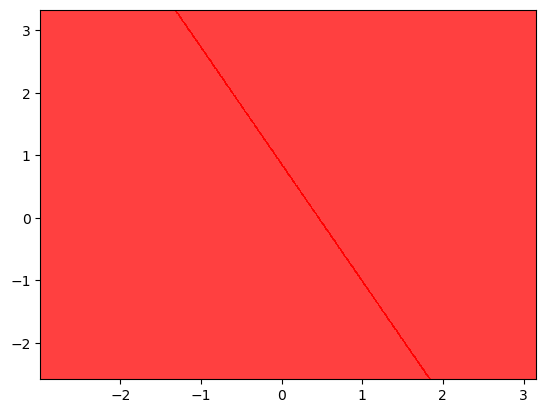

In [26]:
plt.contourf(x1, 
             x2, 
             classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,
             cmap = ListedColormap("red","green")
            )

(-2.5825424477554764, 3.3274575522443977)

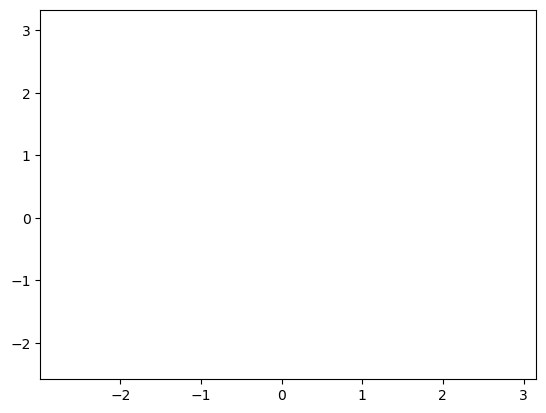

In [27]:
# lim----> limit---->to set the ranges of the X and Y axes
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


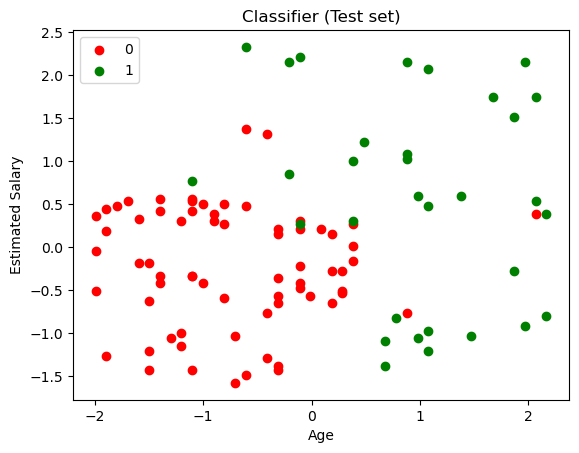

In [36]:
for i, j in enumerate(np.unique(yset)):
    plt.scatter(xset[yset == j, 0], xset[yset == j, 1],c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


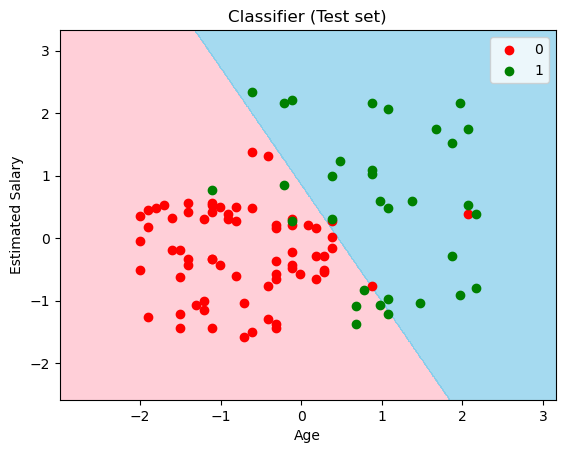

In [40]:
from matplotlib.colors import ListedColormap
  
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('pink', 'skyblue')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
      
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()